# 6.4 Machine Learning

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
Bonus: performance improvement after removing outliers¶

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [11]:
df = pd.read_excel('/Users/Mimi/Downloads/Achievement 6 /Data/housing_6.1.xlsx', index_col = False)

# 2. Data Cleaning

In [13]:
df.columns

Index(['Unnamed: 0', 'Project ID', 'Project Name', 'Project Start Date',
       'Project Completion Date', 'Building ID', 'Number', 'Street', 'Borough',
       'Postcode', 'BBL', 'BIN', 'Community Board', 'Council District',
       'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude',
       'Longitude', 'Latitude (Internal)', 'Longitude (Internal)',
       'Building Completion Date', 'Reporting Construction Type',
       'Extended Affordability Only', 'Prevailing Wage Status',
       'Extremely Low Income Units', 'Very Low Income Units',
       'Low Income Units', 'Moderate Income Units', 'Middle Income Units',
       'Other Income Units', 'Studio Units', '1-BR Units', '2-BR Units',
       '3-BR Units', '4-BR Units', '5-BR Units', '6-BR+ Units',
       'Unknown-BR Units', 'Counted Rental Units',
       'Counted Homeownership Units', 'All Counted Units', 'Total Units'],
      dtype='object')

In [14]:
df.head(20)

,Unnamed: 0,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,0,72920,CONFIDENTIAL,2022-09-30,2022-09-30,NaN,----,----,Staten Island,NaN,...,0,1,0,0,0,0,0,1,1,1
1,1,72941,CONFIDENTIAL,2022-09-30,2022-09-30,NaN,----,----,Brooklyn,NaN,...,1,0,0,0,0,0,0,1,1,1
2,2,70648,3300 PALMER AVE.HPO.FY23,2022-09-29,2022-09-29,832306.0,3300,PALMER AVENUE,Bronx,10475.0,...,83,45,0,0,0,0,135,0,135,135
3,3,72917,CONFIDENTIAL,2022-09-23,2022-09-23,NaN,----,----,Staten Island,NaN,...,0,1,0,0,0,0,0,1,1,1
4,4,72918,CONFIDENTIAL,2022-09-23,2022-09-23,NaN,----,----,Brooklyn,NaN,...,0,1,0,0,0,0,0,1,1,1
5,5,72919,CONFIDENTIAL,2022-09-23,2022-09-23,NaN,----,----,Bronx,NaN,...,0,0,0,0,0,0,0,1,1,1
6,6,68833,SETTLEMENT. SHF CLUSTER. NR REHAB,2022-09-22,NaT,66439.0,690,EAST 182 STREET,Bronx,10457.0,...,12,0,0,0,0,0,50,0,50,50
7,7,68833,SETTLEMENT. SHF CLUSTER. NR REHAB,2022-09-22,NaT,66759.0,737,EAST 187 STREET,Bronx,10458.0,...,15,5,0,0,0,0,31,0,31,31
8,8,68833,SETTLEMENT. SHF CLUSTER. NR REHAB,2022-09-22,NaT,66764.0,751,EAST 187 STREET,Bronx,10458.0,...,18,1,0,0,0,0,29,0,29,29
9,9,68833,SETTLEMENT. SHF CLUSTER. NR REHAB,2022-09-22,NaT,81701.0,1466,GRAND CONCOURSE,Bronx,10457.0,...,29,6,0,0,0,0,58,0,58,58


In [18]:
# Check for missing values

df.isnull().sum()

# Momentarily leaving in missing values

Unnamed: 0                               0
Project ID                               0
Project Name                             0
Project Start Date                       0
Project Completion Date               1904
Building ID                           1257
Number                                   0
Street                                   0
Borough                                  0
Postcode                              1303
BBL                                   1364
BIN                                   1364
Community Board                          0
Council District                        92
Census Tract                          1303
NTA - Neighborhood Tabulation Area    1296
Latitude                              1303
Longitude                             1303
Latitude (Internal)                   1371
Longitude (Internal)                  1371
Building Completion Date              1702
Reporting Construction Type              0
Extended Affordability Only              0
Prevailing 

In [16]:
dups = df.duplicated()

In [17]:
dups.shape # No dups

(6075,)

/Users/Mimi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Counted Rental Units', ylabel='Density'>

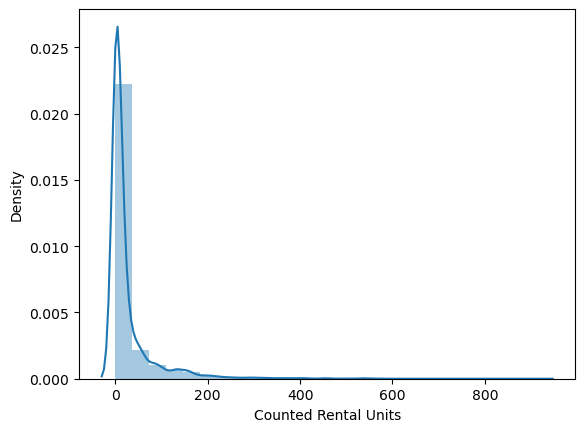

In [21]:
sns.distplot(df['Counted Rental Units'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [22]:
df['Counted Rental Units'].mean() # Check the mean

26.069135802469138

In [23]:
df['Counted Rental Units'].median() # Check the median

6.0

In [24]:
df['Counted Rental Units'].max() # Check the max

917

# 3. Data prep for regression analysis

In [40]:
# possible hypothesis, though the data is made up primarily of independent variables: might there be a positive correllation between extremely low income units and the total counted rental units? 
# i.e., is the building of extremely low units correlated to the totals of built units in any case, and might it be predictive of trends in amount of units?

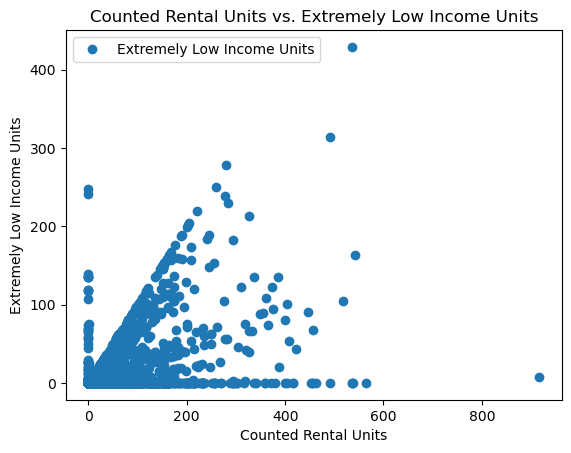

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Counted Rental Units', y='Extremely Low Income Units',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Counted Rental Units vs. Extremely Low Income Units')  
plt.xlabel('Counted Rental Units')  
plt.ylabel('Extremely Low Income Units')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Counted Rental Units'].values.reshape(-1,1)
y = df['Extremely Low Income Units'].values.reshape(-1,1)

In [28]:
X

array([[  0],
       [  0],
       [135],
       ...,
       [  0],
       [  0],
       [  0]])

In [29]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

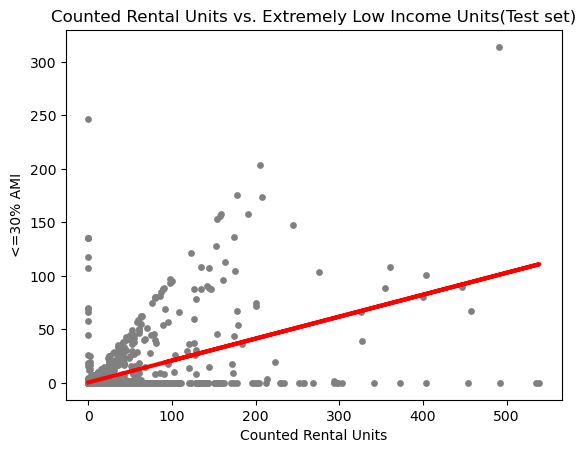

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Counted Rental Units vs. Extremely Low Income Units(Test set)')
plot_test.xlabel('Counted Rental Units')
plot_test.ylabel('<=30% AMI')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20500576]]
Mean squared error:  396.64137306816366
R2 score:  0.17519598600665365


In [37]:
y_predicted

array([[ 0.45770035],
       [15.4231211 ],
       [13.57806922],
       ...,
       [ 2.30275222],
       [ 3.32778104],
       [19.52323637]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.457700
1,0,15.423121
2,0,13.578069
3,0,16.858161
4,0,1.072718
5,0,1.072718
6,0,14.808104
7,0,13.578069
8,7,1.892741
9,3,2.097746


In [41]:
# the metrics in this particular dataset are not ideal to be used for machine learning/ regression as the variables are all relatively independent rather than dependent. 
# so i performed a kind of test regression for the excercise, but knowing that it would not be super helpful for our prurposes here